In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
file = pd.DataFrame(digits.data, columns = digits.feature_names)

In [5]:
file['Number'] = digits.target

In [6]:
file

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
X = file.drop('Number', axis= 'columns')
Y = file.Number

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [10]:
len(train_X)

1437

In [11]:
len(test_X)

360

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model = KNeighborsClassifier(n_neighbors=5)

In [14]:
model.fit(train_X, train_y)

KNeighborsClassifier()

In [15]:
model.score(test_X, test_y)

0.9833333333333333

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
grid_model = GridSearchCV(KNeighborsClassifier(), {
    "n_neighbors" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}, cv=4, return_train_score=False)

In [18]:
grid_model.fit(X, Y)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [19]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010390,0.003130,0.070180,0.005045,1,{'n_neighbors': 1},0.966667,0.966592,0.977728,0.959911,0.967725,0.006394,1
1,0.012965,0.001222,0.075797,0.002231,2,{'n_neighbors': 2},0.962222,0.955457,0.973274,0.962138,0.963273,0.006394,4
2,0.013242,0.000820,0.074565,0.003403,3,{'n_neighbors': 3},0.955556,0.953229,0.973274,0.971047,0.963276,0.008957,3
3,0.009974,0.002229,0.070346,0.004730,4,{'n_neighbors': 4},0.951111,0.957684,0.979955,0.968820,0.964392,0.010991,2
4,0.012467,0.000863,0.076046,0.002272,5,{'n_neighbors': 5},0.948889,0.966592,0.971047,0.964365,0.962723,0.008342,5
5,0.010970,0.002116,0.072331,0.003593,6,{'n_neighbors': 6},0.951111,0.962138,0.973274,0.955457,0.960495,0.008358,6
6,0.009643,0.001406,0.070158,0.006063,7,{'n_neighbors': 7},0.944444,0.964365,0.971047,0.953229,0.958271,0.010210,7
7,0.011237,0.001925,0.063288,0.009088,8,{'n_neighbors': 8},0.946667,0.962138,0.966592,0.953229,0.957157,0.007735,8
8,0.010190,0.002355,0.069849,0.006801,9,{'n_neighbors': 9},0.935556,0.962138,0.973274,0.955457,0.956606,0.013719,9
9,0.011957,0.002331,0.069315,0.002684,10,{'n_neighbors': 10},0.935556,0.944321,0.975501,0.953229,0.952152,0.014859,10


In [20]:
best_params = grid_model.best_params_

In [21]:
new_model = KNeighborsClassifier(n_neighbors = best_params['n_neighbors'])

In [22]:
new_model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=1)

In [23]:
new_model.score(test_X, test_y)

0.9861111111111112

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cm = confusion_matrix(test_y, new_model.predict(test_X))

In [26]:
cm 

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 31]], dtype=int64)

In [27]:
import seaborn as sns

<Axes: >

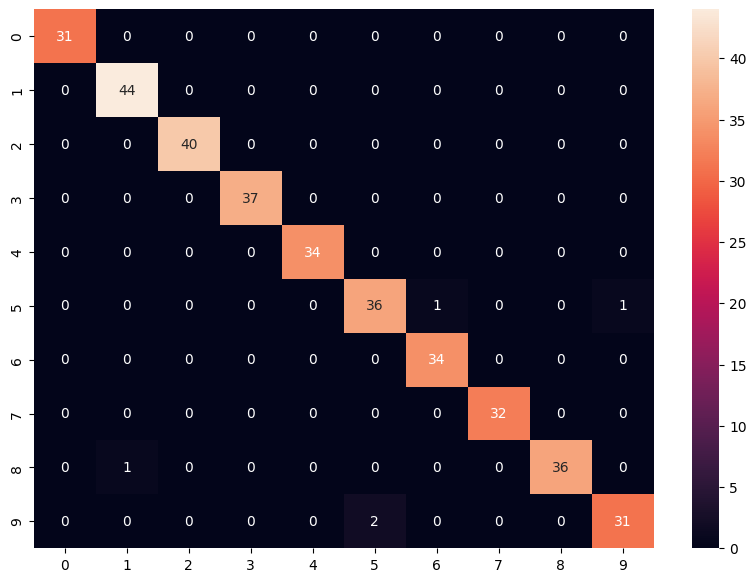

In [29]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)

In [30]:
from sklearn.metrics import classification_report

In [31]:
report = classification_report(test_y, new_model.predict(test_X))

In [33]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        34
           5       0.95      0.95      0.95        38
           6       0.97      1.00      0.99        34
           7       1.00      1.00      1.00        32
           8       1.00      0.97      0.99        37
           9       0.97      0.94      0.95        33

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

